# Meteorite project using KNeighbors

In [1]:
import pandas as pd
meteorite=pd.read_csv('Meteorie.csv')
meteorite

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)"
...,...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,1990.0,29.03700,17.01850,"(29.037, 17.0185)"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,1999.0,13.78333,8.96667,"(13.78333, 8.96667)"
45713,Zlin,30410,Valid,H4,3.3,Found,1939.0,49.25000,17.66667,"(49.25, 17.66667)"
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,2003.0,49.78917,41.50460,"(49.78917, 41.5046)"


In [2]:
meteorite['fall'] = meteorite['fall'].replace({'Found':1,'Fell':0})

# Exclude all class except the top 5

In [3]:
final_data=meteorite.drop(columns=['GeoLocation','id','nametype','name'])
import pandas as pd

classes_to_be_kept = ['L6', 'H5', 'L5','H6','H4']

final_data = final_data[final_data['recclass'].isin(classes_to_be_kept)]
final_data = final_data.reset_index()
final_data=final_data.drop(columns=['index'])

In [4]:
value_counts = final_data['recclass'].value_counts()
value_counts

recclass
L6    8285
H5    7142
L5    4796
H6    4528
H4    4211
Name: count, dtype: int64

# Dealing with nan values using SimpleImputer with mean strategy

In [5]:
from sklearn.impute import SimpleImputer
import numpy as np
 
imputer_num = SimpleImputer(missing_values=np.nan, strategy='mean')

# for string using most_frequent strategy
imputer_cat = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
 
num_cols = ['mass (g)', 'year', 'reclat', 'reclong']
cat_col = ['recclass']
 
final_data[num_cols] = imputer_num.fit_transform(final_data[num_cols]) 
final_data[cat_col] = imputer_cat.fit_transform(final_data[cat_col])


In [6]:
print('Mass null value: ',final_data['mass (g)'].isnull().sum())
print('Year null value: ',final_data['year'].isnull().sum())
print('Latitude null value: ',final_data['reclat'].isnull().sum())
print('Longitude null value: ',final_data['reclong'].isnull().sum())
print('reclass null value: ',final_data['recclass'].isnull().sum())

Mass null value:  0
Year null value:  0
Latitude null value:  0
Longitude null value:  0
reclass null value:  0


# Dividing Data into X and Y

In [7]:
X = final_data.drop(columns=['fall']) 
Y = final_data['fall']

# Encoding reclass using OneHotEncoder

In [8]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
encoded_data = encoder.fit_transform(X[['recclass']])

# Get the feature names for the encoded columns
feature_names = encoder.get_feature_names_out(['recclass'])
encoded_df = pd.DataFrame(encoded_data, columns=feature_names)

train = pd.concat([X.reset_index(drop=True), encoded_df], axis=1)

X = train
X = X.drop(columns=['recclass'])

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# Using KNeighborsClassifier

In [9]:
from sklearn.neighbors import KNeighborsClassifier 
knn=KNeighborsClassifier(n_neighbors=1)

knn.fit(X, Y)

KNeighborsClassifier(n_neighbors=1)

# Split data to train and test

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

# Scaling using StandardScaler

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_std= scaler.fit_transform(X_train) 
y_std = Y_train.to_numpy()

In [12]:
x_std= pd.DataFrame(x_std,columns = ['mass (g)','year','reclat','reclong','recclass_H4','recclass_H5','recclass_H6','recclass_L5','recclass_L6'])

In [13]:
print('mean = 0  and std = 1')
print('----------------------')
print(x_std.describe().round(3))

mean = 0  and std = 1
----------------------
        mass (g)       year     reclat    reclong  recclass_H4  recclass_H5  \
count  23169.000  23169.000  23169.000  23169.000    23169.000    23169.000   
mean       0.000     -0.000     -0.000      0.000       -0.000       -0.000   
std        1.000      1.000      1.000      1.000        1.000        1.000   
min       -0.046    -54.465     -1.058     -3.131       -0.415       -0.571   
25%       -0.046     -0.259     -0.794     -0.651       -0.415       -0.571   
50%       -0.045      0.222     -0.680     -0.004       -0.415       -0.571   
75%       -0.042      0.511      1.027      1.232       -0.415       -0.571   
max      122.225      0.992      2.964      1.493        2.409        1.750   

       recclass_H6  recclass_L5  recclass_L6  
count    23169.000    23169.000    23169.000  
mean        -0.000        0.000        0.000  
std          1.000        1.000        1.000  
min         -0.432       -0.445       -0.630  
25%     

# Prediction

In [14]:
knn.fit(X_train,Y_train)
y_pred=knn.predict(X_test)

# Accuracy

In [15]:
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(Y_test, y_pred)
accuracy

0.9841187640255481

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

report = classification_report(Y_test, y_pred)

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.52      0.57       118
           1       0.99      0.99      0.99      5675

    accuracy                           0.98      5793
   macro avg       0.81      0.76      0.78      5793
weighted avg       0.98      0.98      0.98      5793



**Becase accurecy is very high (0.98) we count ones and zeros
 1 = 28320 and 0 = 642 | (number of zeros / number of ones) = 0.0226 so data is**

In [17]:
value_counts = final_data['fall'].value_counts()
value_counts

fall
1    28320
0      642
Name: count, dtype: int64

# Using Cohen's kappa

Cohen's kappa coefficient (κ, lowercase Greek kappa) is a statistic that is used to measure inter-rater reliability (and also intra-rater reliability) for qualitative (categorical) items. It is generally thought to be a more robust measure than simple percent agreement calculation, as κ takes into account the possibility of the agreement occurring by chance.

In [18]:
from sklearn.metrics import cohen_kappa_score
#accurecy - probabiltiy
kappa = cohen_kappa_score(Y_test, y_pred)
print("Cohen's Kappa:", kappa)

Cohen's Kappa: 0.562090504385208


In [19]:
k_values={}
k=1
kappa_max = 0
while k<=25 :
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,Y_train)
    y_pred=knn.predict(X_test)
    kappa = cohen_kappa_score(Y_test, y_pred)
    kappa_max = max(kappa_max,kappa)
    print("Cohen's Kappa: " , k , kappa)
    k+=1
print (k_values)

Cohen's Kappa:  1 0.562090504385208
Cohen's Kappa:  2 0.5375419273699515
Cohen's Kappa:  3 0.4735830162587509
Cohen's Kappa:  4 0.5163566685066348
Cohen's Kappa:  5 0.42526855155294974
Cohen's Kappa:  6 0.47622711486401437
Cohen's Kappa:  7 0.4136489809272106
Cohen's Kappa:  8 0.4573030299938504
Cohen's Kappa:  9 0.3808791582694271
Cohen's Kappa:  10 0.4164799604127324
Cohen's Kappa:  11 0.3419880946891697
Cohen's Kappa:  12 0.37331988059624754
Cohen's Kappa:  13 0.33129400900380923
Cohen's Kappa:  14 0.37832904257337197
Cohen's Kappa:  15 0.2778201165728157
Cohen's Kappa:  16 0.30726970203936144
Cohen's Kappa:  17 0.2778201165728157
Cohen's Kappa:  18 0.28502517431700614
Cohen's Kappa:  19 0.2236010662324962
Cohen's Kappa:  20 0.2604671859783416
Cohen's Kappa:  21 0.21097103356238078
Cohen's Kappa:  22 0.2236010662324962
Cohen's Kappa:  23 0.21636294027565084
Cohen's Kappa:  24 0.21274320069861608
Cohen's Kappa:  25 0.19009017639154624
{}


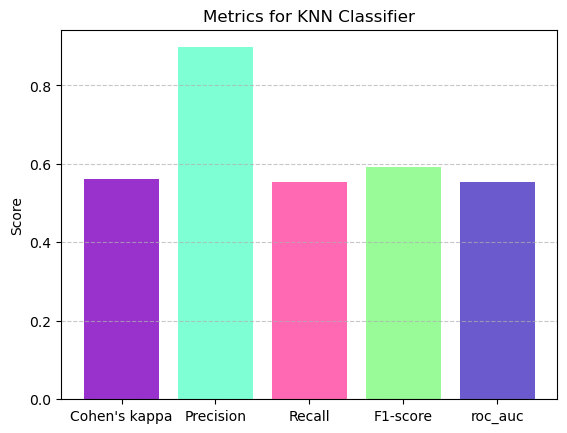

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve

accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred, average='macro')
recall = recall_score(Y_test, y_pred, average='macro')
f1 = f1_score(Y_test, y_pred, average='macro')
conf_matrix = confusion_matrix(Y_test, y_pred)
roc_auc = roc_auc_score(Y_test, y_pred)
fpr, tpr, thresholds = roc_curve(Y_test, y_pred)
precision_curve, recall_curve, _ = precision_recall_curve(Y_test, y_pred)

kappa_mlp = cohen_kappa_score(Y_test, y_pred)
colors = ['darkorchid', 'aquamarine', 'hotpink', 'palegreen', 'slateblue']
labels = ['Cohen\'s kappa', 'Precision', 'Recall', 'F1-score','roc_auc']
values = [kappa_max, precision, recall, f1,roc_auc]

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.bar(labels, values,color=colors )
plt.title('Metrics for KNN Classifier')
plt.ylabel('Score')
plt.show()

### The best k is k = 2